In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import random
from __future__ import print_function
import warnings
from shutil import copyfile

import imutils 
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# import the necessary packages
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import imutils 
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import Sequence
import matplotlib.pyplot as plt
import numpy as np
import os


class MergedGenerators(Sequence):
    def __init__(self, batch_size, generators=[], sub_batch_size=[]):
        self.generators = generators
        self.sub_batch_size = sub_batch_size
        self.batch_size = batch_size

    def __len__(self):
        return int(
            sum([(len(self.generators[idx]) * self.sub_batch_size[idx])
                 for idx in range(len(self.sub_batch_size))]) /
            self.batch_size)

    def __getitem__(self, index):
        """Getting items from the generators and packing them"""

        X_batch = []
        Y_batch = []
        for generator in self.generators:
            if generator.class_mode is None:
                x1 = generator[index % len(generator)]
                X_batch = [*X_batch, *x1]

            else:
                x1, y1 = generator[index % len(generator)]
                X_batch = [*X_batch, *x1]
                Y_batch = [*Y_batch, *y1]

        if self.generators[0].class_mode is None:
            return np.array(X_batch)
        return np.array(X_batch), np.array(Y_batch)

In [ ]:
# create a data generator
datagen = ImageDataGenerator()
'''featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=20,
    width_shift_range=0.5,
    height_shift_range=0.5,
    brightness_range=None,
    shear_range=0.5,
    zoom_range=0.0,
    channel_shift_range=0.3,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,'''

'featurewise_center=False,\n    samplewise_center=False,\n    featurewise_std_normalization=False,\n    samplewise_std_normalization=False,\n    zca_whitening=False,\n    zca_epsilon=1e-06,\n    rotation_range=20,\n    width_shift_range=0.5,\n    height_shift_range=0.5,\n    brightness_range=None,\n    shear_range=0.5,\n    zoom_range=0.0,\n    channel_shift_range=0.3,\n    fill_mode="nearest",\n    cval=0.0,\n    horizontal_flip=True,\n    vertical_flip=True,\n    rescale=None,\n    preprocessing_function=None,\n    data_format=None,\n    validation_split=0.0,\n    dtype=None,'

In [ ]:
train_gen1 = datagen.flow_from_directory('/content/drive/My Drive/intern_code/main2/training',seed = 1,
                                                   target_size=(224,224),
                                                   color_mode='rgb',
                                                   batch_size=16,
                                                   class_mode='categorical')

Found 2342 images belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_gen2 = datagen.flow_from_directory('/content/drive/My Drive/intern_code/main_clahe_1.5/training/',seed = 1,
                                                   target_size=(224,224),
                                                   color_mode='rgb',
                                                   batch_size=16,
                                                   class_mode='categorical')

In [ ]:
val_gen1 = datagen.flow_from_directory('/content/drive/My Drive/intern_code/main2/testing/',target_size=(224,224),
                                                             color_mode='rgb',
                                                             batch_size=4,
                                                             class_mode='categorical')

Found 586 images belonging to 2 classes.


In [ ]:
val_gen2 = datagen.flow_from_directory('/content/drive/My Drive/intern_code/main_clahe_1.5/testing/',target_size=(224,224),
                                                             color_mode='rgb',
                                                             batch_size=4,
                                                             class_mode='categorical')

Found 77 images belonging to 2 classes.


In [ ]:
merge_train = MergedGenerators(
        32,
        generators=[train_gen1, train_gen2],
        sub_batch_size=[16, 16])

In [ ]:
merge_val = MergedGenerators(
    8,
    generators=[val_gen1,val_gen2],
    sub_batch_size=[4,4])

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="swish"))
model.add(Conv2D(32, (5, 5), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(64, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(128, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="swish"))
model.add(Conv2D(256, (3, 3), activation="swish"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation="swish"))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 110, 110, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0

In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
#opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',METRICS])
# train the network
early_stopping = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=2, min_lr=0.001)
#EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/intern_code/'+get_model_name("swish_my model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='m4/1AfDhmrj7JgD2OxLL3WNit6xelkbJ3xrSzTQ4MT_7IiiJRgANLGcBxVZedgUax')
callbacks_list = [checkpointer,early_stopping]
#class_weights={0:(1/1121),1:(1/1832)}
print("[INFO] training network...")
H = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, epochs=70, verbose=1,batch_size=64, steps_per_epoch=2342//BS, validation_steps=16)

[INFO] training network...
Epoch 1/70
36/36 [==============================] - ETA: 0s - loss: 0.9872 - accuracy: 0.6820 - tp: 528.0000 - fp: 294.0000 - tn: 528.0000 - fn: 294.0000 - auc: 0.6453
Epoch 00001: val_accuracy improved from -inf to 0.54688, saving model to /content/drive/My Drive/intern_code/model_swish_my model.h5
36/36 [==============================] - 337s 9s/step - loss: 0.9872 - accuracy: 0.6820 - tp: 528.0000 - fp: 294.0000 - tn: 528.0000 - fn: 294.0000 - auc: 0.6453 - val_loss: 17.7080 - val_accuracy: 0.5469 - val_tp: 35.0000 - val_fp: 29.0000 - val_tn: 35.0000 - val_fn: 29.0000 - val_auc: 0.5659
Epoch 2/70
36/36 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.6875 - tp: 396.0000 - fp: 180.0000 - tn: 396.0000 - fn: 180.0000 - auc: 0.7454
Epoch 00002: val_accuracy improved from 0.54688 to 0.73438, saving model to /content/drive/My Drive/intern_code/model_swish_my model.h5
36/36 [==============================] - 337s 9s/step - loss: 0.6918 - ac

In [ ]:
H1 = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, epochs=30, verbose=1,batch_size=64, steps_per_epoch=2342//BS, validation_steps=16)

Epoch 1/30
36/36 [==============================] - ETA: 0s - loss: 0.3035 - accuracy: 0.8750 - tp: 504.0000 - fp: 72.0000 - tn: 504.0000 - fn: 72.0000 - auc: 0.9439
Epoch 00001: val_accuracy did not improve from 0.89062
36/36 [==============================] - 322s 9s/step - loss: 0.3035 - accuracy: 0.8750 - tp: 504.0000 - fp: 72.0000 - tn: 504.0000 - fn: 72.0000 - auc: 0.9439 - val_loss: 0.5950 - val_accuracy: 0.7812 - val_tp: 50.0000 - val_fp: 14.0000 - val_tn: 50.0000 - val_fn: 14.0000 - val_auc: 0.8352
Epoch 2/30
36/36 [==============================] - ETA: 0s - loss: 0.2864 - accuracy: 0.8837 - tp: 509.0000 - fp: 67.0000 - tn: 509.0000 - fn: 67.0000 - auc: 0.9499
Epoch 00002: val_accuracy did not improve from 0.89062
36/36 [==============================] - 328s 9s/step - loss: 0.2864 - accuracy: 0.8837 - tp: 509.0000 - fp: 67.0000 - tn: 509.0000 - fn: 67.0000 - auc: 0.9499 - val_loss: 0.3986 - val_accuracy: 0.8281 - val_tp: 53.0000 - val_fp: 11.0000 - val_tn: 53.0000 - val_fn: 

In [ ]:
model.save('/content/drive/My Drive/intern_code/swish_my_model.h5')

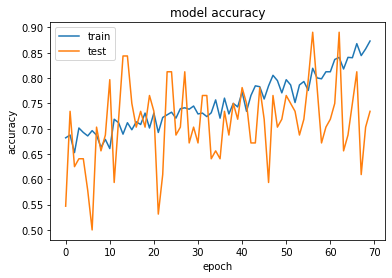

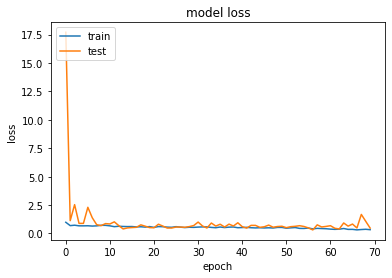

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/swish_my_model_64_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/swish_my_model_64_loss_vs_epoch.jpg')
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

In [ ]:
EPOCHS = 50
INIT_LR = 1e-4
BS = 32
IMAGE_DIMS = (224,224)

In [ ]:
#32,64,128,256,d 2048,102
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',METRICS])
# train the network
early_stopping = EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/intern_code/'+get_model_name("new_my model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
callbacks_list = [checkpointer]
#class_weights={0:(1/1121),1:(1/1832)}
print("[INFO] training network...")
H = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, epochs=50, verbose=1,steps_per_epoch=73, validation_steps=16)

[INFO] training network...
Epoch 1/50
73/73 [==============================] - ETA: 0s - loss: 1.6217 - accuracy: 0.6541 - tp: 764.0000 - fp: 404.0000 - tn: 764.0000 - fn: 404.0000
Epoch 00001: val_accuracy improved from -inf to 0.54688, saving model to /content/drive/My Drive/intern_code/model_new_my model.h5
73/73 [==============================] - 644s 9s/step - loss: 1.6217 - accuracy: 0.6541 - tp: 764.0000 - fp: 404.0000 - tn: 764.0000 - fn: 404.0000 - val_loss: 2.2294 - val_accuracy: 0.5469 - val_tp: 35.0000 - val_fp: 29.0000 - val_tn: 35.0000 - val_fn: 29.0000
Epoch 2/50
73/73 [==============================] - ETA: 0s - loss: 0.7112 - accuracy: 0.6770 - tp: 784.0000 - fp: 374.0000 - tn: 784.0000 - fn: 374.0000
Epoch 00002: val_accuracy improved from 0.54688 to 0.73438, saving model to /content/drive/My Drive/intern_code/model_new_my model.h5
73/73 [==============================] - 630s 9s/step - loss: 0.7112 - accuracy: 0.6770 - tp: 784.0000 - fp: 374.0000 - tn: 784.0000 - fn:

In [ ]:
model.save('/content/drive/My Drive/intern_code/2_new_another_model.h5')

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/2_new_another_my_model_64_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/2_new_another_my_model_64_loss_vs_epoch.jpg')
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', input_shape=(224, 224, 3), activation="relu"))
model.add(Conv2D(32, (5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 224, 224, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 32)      25632     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 110, 110, 32)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 110, 110, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 110, 110, 64)      18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 64)       

In [ ]:
# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
#32,32,64,64,D512
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',METRICS])
# train the network
early_stopping = EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/intern_code/'+get_model_name("new_my model"), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
callbacks_list = [checkpointer]
#class_weights={0:(1/1121),1:(1/1832)}
print("[INFO] training network...")
H = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, epochs=EPOCHS, verbose=1,steps_per_epoch=42, validation_steps=16)

[INFO] training network...
Epoch 1/64
42/42 [==============================] - ETA: 0s - loss: 154.6418 - accuracy: 0.5580 - tp: 375.0000 - fp: 297.0000 - tn: 375.0000 - fn: 297.0000
Epoch 00001: val_accuracy improved from -inf to 0.75000, saving model to /content/drive/My Drive/intern_code/model_new_my model.h5
42/42 [==============================] - 368s 9s/step - loss: 154.6418 - accuracy: 0.5580 - tp: 375.0000 - fp: 297.0000 - tn: 375.0000 - fn: 297.0000 - val_loss: 0.6717 - val_accuracy: 0.7500 - val_tp: 48.0000 - val_fp: 16.0000 - val_tn: 48.0000 - val_fn: 16.0000
Epoch 2/64
42/42 [==============================] - ETA: 0s - loss: 0.6581 - accuracy: 0.6548 - tp: 440.0000 - fp: 232.0000 - tn: 440.0000 - fn: 232.0000
Epoch 00002: val_accuracy did not improve from 0.75000
42/42 [==============================] - 311s 7s/step - loss: 0.6581 - accuracy: 0.6548 - tp: 440.0000 - fp: 232.0000 - tn: 440.0000 - fn: 232.0000 - val_loss: 0.6538 - val_accuracy: 0.6250 - val_tp: 40.0000 - val

In [ ]:
model.save('/content/drive/My Drive/intern_code/new_another model.h5')

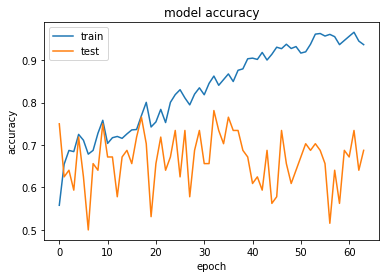

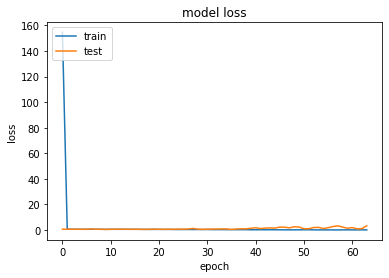

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/new_other_my_model_50_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/new_other_my_model_50_loss_vs_epoch.jpg')
plt.show()

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))

In [ ]:
width=224
height=224
depth=3
classes=2
finalAct="softmax"

# initialize the model along with the input shape to be
# "channels last" and the channels dimension itself
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1

# if we are using "channels first", update the input shape
# and channels dimension
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))#,kernel_regularizer=tf.keras.regularizers.l1(0.0001), activity_regularizer=tf.keras.regularizers.l2(0.0001)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
'''model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))'''
model.add(Flatten())
model.add(Dense(265, activation='relu'))
model.add(Dense(classes, activation='softmax'))



In [ ]:
EPOCHS = 70
INIT_LR = 1e-3
BS = 64
IMAGE_DIMS = (224,224)

In [ ]:
# initialize the optimizer (SGD is sufficient)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.AUC(name='auc')
]

In [ ]:
def get_model_name(k):
    return 'model_'+str(k)+'.h5'

In [ ]:
# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
#32,32,64,64,D512
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',METRICS])
# train the network
early_stopping = EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/intern_code/'+get_model_name(1), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
callbacks_list = [checkpointer]
class_weights={0:(1/902),1:(1/1442)}
print("[INFO] training network...")
H = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, epochs=EPOCHS, verbose=1,steps_per_epoch=42, validation_steps=16)

NameError: ignored

In [ ]:
#https://www.kaggle.com/khanfashee/detect-child-pneumonia-using-mobilenet-auc-0-96/comments

In [ ]:
model.save('/content/drive/My Drive/intern_code/another model.h5')

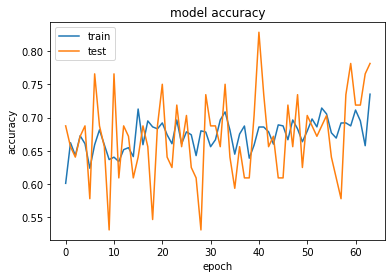

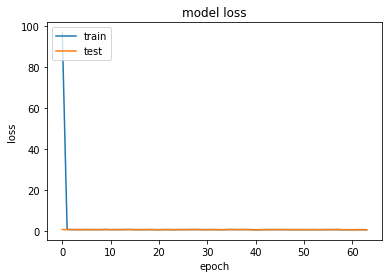

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/other_my_model_50_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/other_my_model_50_loss_vs_epoch.jpg')
plt.show()

In [ ]:
# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution

2,2,3
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy',METRICS])
# train the network
early_stopping = EarlyStopping(patience=10)
#checkpointer = ModelCheckpoint('best1.h5', verbose=1, save_best_only=True)
checkpointer = ModelCheckpoint('/content/drive/My Drive/intern_code/'+get_model_name(1), 
							monitor='val_accuracy', verbose=1, 
							save_best_only=True, mode='max')
callbacks_list = [checkpointer]
#class_weights={0:(1/1121),1:(1/1832)}
print("[INFO] training network...")
H = model.fit(train_gen1, validation_data=val_gen1,callbacks=callbacks_list, steps_per_epoch=10, epochs=EPOCHS, verbose=1)

[INFO] training network...
Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 178.2596 - accuracy: 0.5312 - tp: 85.0000 - fp: 75.0000 - tn: 85.0000 - fn: 75.0000
Epoch 00001: val_accuracy improved from -inf to 0.47270, saving model to /content/drive/My Drive/intern_code/model_1.h5
10/10 [==============================] - 20s 2s/step - loss: 178.2596 - accuracy: 0.5312 - tp: 85.0000 - fp: 75.0000 - tn: 85.0000 - fn: 75.0000 - val_loss: 3.3145 - val_accuracy: 0.4727 - val_tp: 277.0000 - val_fp: 309.0000 - val_tn: 277.0000 - val_fn: 309.0000
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.4584 - accuracy: 0.5500 - tp: 88.0000 - fp: 72.0000 - tn: 88.0000 - fn: 72.0000
Epoch 00002: val_accuracy improved from 0.47270 to 0.68089, saving model to /content/drive/My Drive/intern_code/model_1.h5
10/10 [==============================] - 18s 2s/step - loss: 1.4584 - accuracy: 0.5500 - tp: 88.0000 - fp: 72.0000 - tn: 88.0000 - fn: 72.0000 - val_loss: 0.9067 -

In [ ]:
model.save('/content/drive/My Drive/intern_code/my_model_512-32-6-128-DENSE256-512_Adam_0.0005_50.h5')

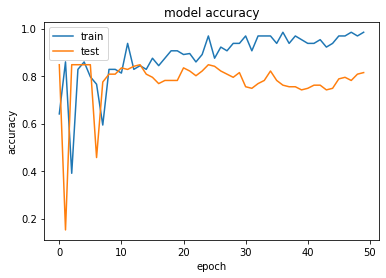

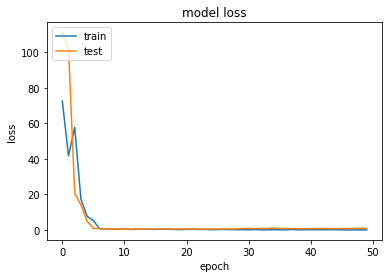

In [ ]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/my_model_512-32-6-128-DENSE256-512_Adam_0.0005_50_acc_vs_epoch.jpg')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('/content/drive/My Drive/intern_code/my_model_512-32-6-128-DENSE256-512_Adam_0.0005_50_loss_vs_epoch.jpg')
plt.show()